## 学习基本的CV2 绘图函数

### 涉及的函数：cv2.line() , cv2.cicle() , cv2.rectangle() , cv2.ellipse() , cv2.putText()
需要设置的参数：  
img 你想要绘制的图形的那副图像  
color 形状的颜色，以RGB为例，需要传入的元组，例（255,0,0）代表蓝色，对于灰度图只需传入灰度值  
thickness 线条的粗细，如果给一个闭合图形设置为-1，那么这个图形就会被填充，默认值为1  
linetype 线条的类型，8连接，抗锯齿等。默认是8连接。cv2.LINE_AA为抗锯齿

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#create a block image
img = np.zeros((512,512,3), np.uint8)


# 画椭圆
'''
params 
     image
     center location (x,y). 
     axes lengths (major axis length, minor axis length).
     angle is the angle of rotation of ellipse in anti-clockwise direction. 
     startAngle and endAngle denotes the starting and ending of ellipse arc measured in clockwise direction from major axis
     color 
     thickness
            '''
cv2.ellipse(img,(256,256),(100,50),0,0,360,255,-1)
plt.imshow(img)
plt.show()




<Figure size 640x480 with 1 Axes>

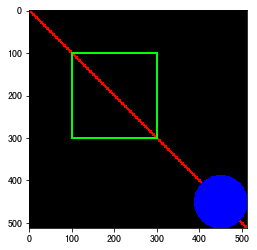

In [6]:
# Create a black image
img = np.zeros((512,512,3), np.uint8)

# Draw a diagonal blue line with thickness of 5 px
img = cv2.line(img,(0,0),(511,511),(255,0,0),5)

#Drawing Rectangle  pt1 – Vertex of the rectangle.            
                   #pt2 – Vertex of the rectangle opposite to pt1 .
img = cv2.rectangle(img,(100,100),(300,300),(0,255,0),3)

# Drawing Circle
img = cv2.circle(img,(450,450), 63, (0,0,255), -1)

plt.imshow(img)
plt.show()


## Drawing Polygon

To draw a polygon, first you need coordinates of vertices. Make those points into an array of `shape ROWSx1x2`   
where ROWS are number of **vertices(顶点)** and it should be of type int32. Here we draw a small polygon of with four vertices in yellow color.

If third argument is False, you will get a polylines joining all the points, not a closed shape.


## 画出多边形和填充 

(4, 1, 2)


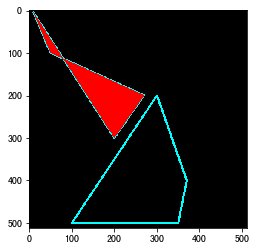

In [11]:
img = np.zeros((512,512,3), np.uint8)

pts = np.array([[10,5],[200,300],[270,200],[50,100]], np.int32)
pts = pts.reshape((-1,1,2))
print(pts.shape) # (4, 1, 2)

pts1 = np.array([[100,500],[300,200],[370,400],[350,500]], np.int32)
pts1 = pts1.reshape((-1,1,2))

# 画出多边形形状
'''
polylines(img, pts, isClosed, color
                [, thickness[, lineType[, shift]]]) → img
            thickness – Thickness of the polyline edges.
            lineType – Type of the line segments. See the line() description.
            shift – Number of fractional bits in the vertex coordinates.
'''
img = cv2.polylines(img,[pts, pts1],True,(0,255,255), 4)

# 填充颜色 
cv2.drawContours(img, [pts], -1, (255, 0, 0), thickness=-1)
'''
drawContours(image, contours, contourIdx, color
               [, thickness[, lineType[, hierarchy[, maxLevel[, offset]]]]]) 
'''



plt.imshow(img)
plt.show()

## drawContours
Parameters:	
`contourIdx` – Parameter indicating a contour to draw. If it is negative, all the contours are drawn.  
`color` – Color of the contours.  
`thickness` – Thickness of lines the contours are drawn with. If it is negative (for example, thickness=CV_FILLED ), the contour interiors are drawn.  
`lineType` – Line connectivity. See line() for details.  
`hierarchy` – Optional information about hierarchy. It is only needed if you want to draw only some of the contours (see maxLevel ).   
`maxLevel` – Maximal level for drawn contours. If it is 0, only the specified contour is drawn. If it is 1, the function draws the contour(s) and all the nested contours. If it is 2, the function draws the contours, all the nested contours, all the nested-to-nested contours, and so on. This parameter is only taken into account when there is hierarchy available.    
`offset` – Optional contour shift parameter. Shift all the drawn contours by the specified \texttt{offset}=(dx,dy) .  
`contour` – Pointer to the first contour.  
`external`_color – Color of external contours.  
`hole_color` – Color of internal contours (holes).